First we load important Python libraries for manipulating data and plotting data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# global variables
dataset_file_path = 'data/processed.cleveland.data'

Next we create functions to load and manipulate the data.

In [2]:
def load_data(filename):
    '''
    Description: reads specified .csv file and returns an X and y dataframe.
    Arguments: .csv file to name
    Return: data - dataframe
            X - dataframe containing features
            y - dataframe containing labels
    
    > 0. age
    > 1. sex
    > 2. chest pain type(4 values)
    > 3. resting blood pressure
    > 4. serum cholestoral in mg/dl
    > 5. fasting blood sugar > 120 mg/dl
    > 6. resting electrocardiographic results(values 0, 1, 2)
    > 7. maximum heart rate achieved
    > 8. exercise induced angina
    > 9. oldpeak = ST depression induced by exercise relative to rest
    > 10. the slope of the peak exercise ST segment
    > 11. number of major vessels(0-3) colored by flourosopy
    > 12. thal: 3 = normal, 6 = fixed defect, 7 = reversable defect
    > 13. num: 0 = no presence, 4 = present
    '''

    # reading the data
    try:
        print("Reading .csv")
        data = pd.read_csv(filename, header=None)
        print("Finished reading .csv")
    except:
        print("Unable to read .csv")

    # set column names
    attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    data.columns = attributes

    X, y = data.iloc[:, 0:-1], data.iloc[:, -1]

    return data, X, y

def preprocess_data(data):
    '''
    Arguments: Pandas Dataframe (X_train or X_test)
    Return: Preprocessed np array
    '''
    # saving columns and indices since ColumnTransformer removes them
    columns = data.columns
    index = data.index

    # defining categorical and numerical features (and categorical feature value range)
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 
                             'exang', 'slope', 'ca', 'thal']
    categories = [[0,1], [1,2,4], [0,1], [0,1,2], 
                  [0,1], [1,2,3], [0,1,2,3], [3,6,7]]
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    # creating transformers
    # categorical_transformer = Pipeline[('onehot', OneHotEncoder())]
    # numerical_transformer = Pipeline[('scaler', StandardScaler())]

    # creating and applying ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[('num', StandardScaler(), numerical_features),
                      ('cat', OneHotEncoder(categories=categories, 
                                            handle_unknown='ignore'),
                       categorical_features)], n_jobs=-1)

    data = preprocessor.fit_transform(data)
    
    return data

In [3]:
# loading data
data, X, y = load_data(dataset_file_path)

X_new = preprocess_data(X)

Reading .csv
Finished reading .csv


Text(0.5, 1, 'Feature Correlation')

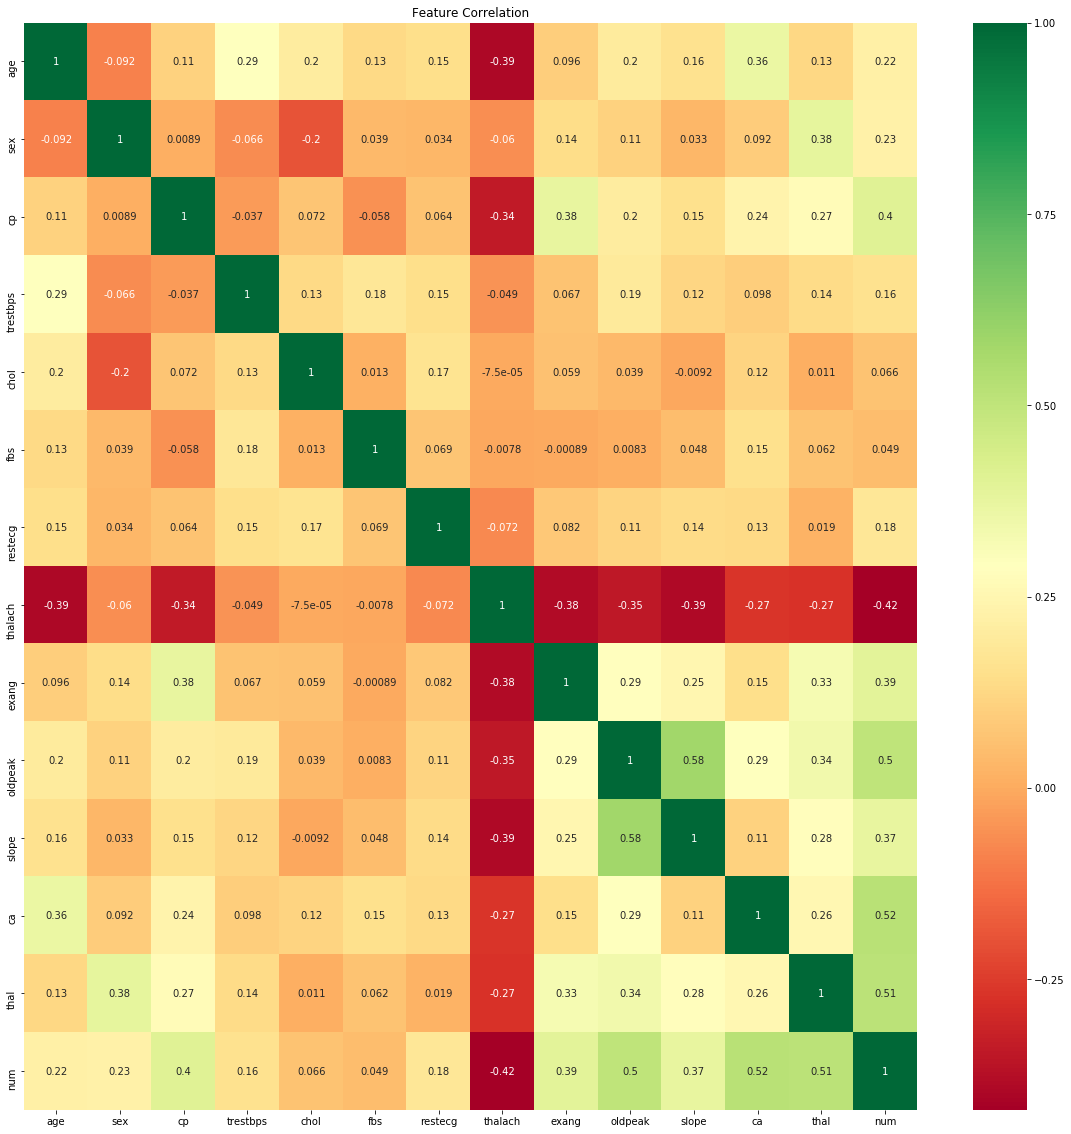

In [32]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title("Feature Correlation")

Text(0.5, 1, 'Feature Correlation with Label')

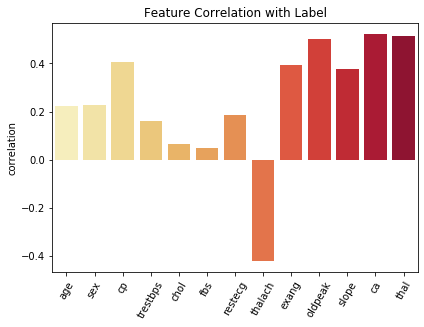

In [30]:
f=sns.barplot(x=corrmat[0:-1].index, y=corrmat.num[0:-1], palette="YlOrRd")
plt.tight_layout()
plt.ylabel("correlation")
plt.xticks(rotation=60)
plt.title("Feature Correlation with Label")